# Factors Contributing to Success of a App (Analysis)

Apps are fascinating right!
   Let's check,  what determine the success of App?

## Goal

The goal of this project is to identify the factors that contribute the success of apps. By performing a data analysis using python, this project aims to provide valuable insights that can help app production companies make more informed decision about which app to produce, which companies to partner with, and how to allocate resources to maximize the chance of success.

Dataset Description:- This Dataset is collected from the GooglePlayStore and includes detailed information about various mobile applications. It contains app-level data that can be used for business analysis, performance evaluation, and category comparison.

## Setup
#### Importing the necessary libraries I will use for this project.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Datasets
#### we have two datasets

In [ ]:
df1 = pd.read_csv("Data/googleplaystore.csv")
df2 = pd.read_csv("Data/googleplaystore_user_reviews.csv")

#### Merging the dataset
Merged two data sets on a common key using a left join. Final insights are based on the primary dataset, as the second dataset contained no critical additional features.

In [3]:
df = pd.merge(df1, df2, how='left', on='App')

#### Looking at the data

In [4]:
df.head()

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   
2                             Coloring book moana  ART_AND_DESIGN     3.9   
3                             Coloring book moana  ART_AND_DESIGN     3.9   
4                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   
2     967  14M  500,000+  Free     0       Everyone   
3     967  14M  500,000+  Free     0       Everyone   
4     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
2  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
3  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
4  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0                                                NaN       NaN   
1  A kid's excessive ads. The types ads allowed a...  Negative   
2                                         It bad >:(  Negative   
3                                               like   Neutral   
4                                                NaN       NaN   

   Sentiment_Polarity  Sentiment_Subjectivity  
0                 NaN                     NaN  
1              -0.250                1.000000  
2              -0.725                0.833333  
3               0.000                0.000000  
4                 NaN                     NaN

## Data Cleaning!
#### checking for missing data

In [5]:
# Let's loop through the data and see is there anything is missing
df.columns = df.columns.str.strip()
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

App - 0%
Category - 0%
Rating - 1%
Reviews - 0%
Size - 0%
Installs - 0%
Type - 0%
Price - 0%
Content Rating - 0%
Genres - 0%
Last Updated - 0%
Current Ver - 0%
Android Ver - 0%
Translated_Review - 45%
Sentiment - 45%
Sentiment_Polarity - 45%
Sentiment_Subjectivity - 45%


#### Dropping nulls

In [6]:
df = df.dropna()

#### Dropping duplicates

In [7]:
df = df.drop_duplicates()

### Checking data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 1 to 131807
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Category                40376 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40376 non-null  object 
 4   Size                    40376 non-null  object 
 5   Installs                40376 non-null  object 
 6   Type                    40376 non-null  object 
 7   Price                   40376 non-null  object 
 8   Content Rating          40376 non-null  object 
 9   Genres                  40376 non-null  object 
 10  Last Updated            40376 non-null  object 
 11  Current Ver             40376 non-null  object 
 12  Android Ver             40376 non-null  object 
 13  Translated_Review       40376 non-null  object 
 14  Sentiment               40376 non-null  ob

####  As you can see we don't have sensitive data like "Budget","Marketing Spend" but it is crucial for analyzation
#### so we are going to create estimated data for now
### Step 1: checking categories

In [9]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### Step 2: Defining my data budget and marketing mappings, on the basis of "Category"

In [10]:
category_budget_map = {
    'ART_AND_DESIGN': 22000,
    'AUTO_AND_VEHICLES': 25000,
    'BEAUTY': 18000,
    'BOOKS_AND_REFERENCE': 15000,
    'BUSINESS': 24000,
    'COMICS': 16000,
    'COMMUNICATION': 28000,
    'DATING': 30000,
    'EDUCATION': 27000,
    'ENTERTAINMENT': 32000,
    'EVENTS': 15000,
    'FINANCE': 26000,
    'FOOD_AND_DRINK': 23000,
    'GAME': 50000,
    'HEALTH_AND_FITNESS': 26000,
    'HOUSE_AND_HOME': 18000,
    'LIBRARIES_AND_DEMO': 12000,
    'LIFESTYLE': 19000,
    'MAPS_AND_NAVIGATION': 25000,
    'MEDICAL': 20000,
    'NEWS_AND_MAGAZINES': 17000,
    'PARENTING': 16000,
    'PERSONALIZATION': 20000,
    'PHOTOGRAPHY': 24000,
    'PRODUCTIVITY': 22000,
    'SHOPPING': 30000,
    'SOCIAL': 28000,
    'SPORTS': 26000,
    'TOOLS': 21000,
    'TRAVEL_AND_LOCAL': 23000,
    'VIDEO_PLAYERS': 27000,
    'WEATHER': 15000
}
category_marketing_map = {
    'ART_AND_DESIGN': 10000,
    'AUTO_AND_VEHICLES': 12000,
    'BEAUTY': 8000,
    'BOOKS_AND_REFERENCE': 6000,
    'BUSINESS': 11000,
    'COMICS': 7000,
    'COMMUNICATION': 15000,
    'DATING': 16000,
    'EDUCATION': 14000,
    'ENTERTAINMENT': 16000,
    'EVENTS': 6000,
    'FINANCE': 13000,
    'FOOD_AND_DRINK': 12000,
    'GAME': 20000,
    'HEALTH_AND_FITNESS': 13000,
    'HOUSE_AND_HOME': 8000,
    'LIBRARIES_AND_DEMO': 4000,
    'LIFESTYLE': 9000,
    'MAPS_AND_NAVIGATION': 11000,
    'MEDICAL': 8000,
    'NEWS_AND_MAGAZINES': 7000,
    'PARENTING': 6000,
    'PERSONALIZATION': 10000,
    'PHOTOGRAPHY': 12000,
    'PRODUCTIVITY': 9000,
    'SHOPPING': 14000,
    'SOCIAL': 15000,
    'SPORTS': 13000,
    'TOOLS': 10000,
    'TRAVEL_AND_LOCAL': 11000,
    'VIDEO_PLAYERS': 13000,
    'WEATHER': 5000
}

### Step 3: Add columns

In [11]:
df['Estimated_Budget'] = df['Category'].map(category_budget_map).fillna(20000)
df['Estimated_Marketing_Spend'] = df['Category'].map(category_marketing_map).fillna(10000)

### "I am using Install counts as a proxy for app success and user reach."

### Checking data types

In [12]:
df.dtypes

App                           object
Category                      object
Rating                       float64
Reviews                       object
Size                          object
Installs                      object
Type                          object
Price                         object
Content Rating                object
Genres                        object
Last Updated                  object
Current Ver                   object
Android Ver                   object
Translated_Review             object
Sentiment                     object
Sentiment_Polarity           float64
Sentiment_Subjectivity       float64
Estimated_Budget             float64
Estimated_Marketing_Spend    float64
dtype: object

### Changing data types of "Installs" (for sorting)

In [13]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

## Ordering the data
#### by most cost-effective apps

In [14]:
df['ROI'] = df['Installs'] / df['Estimated_Budget']
df_sorted = df.sort_values(['ROI'],inplace=False, ascending=False)

### Checking for Outliers

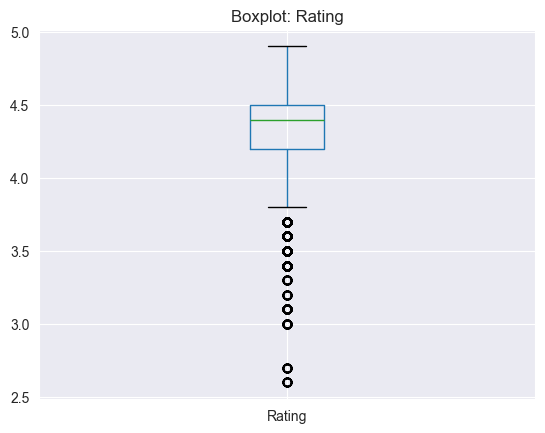

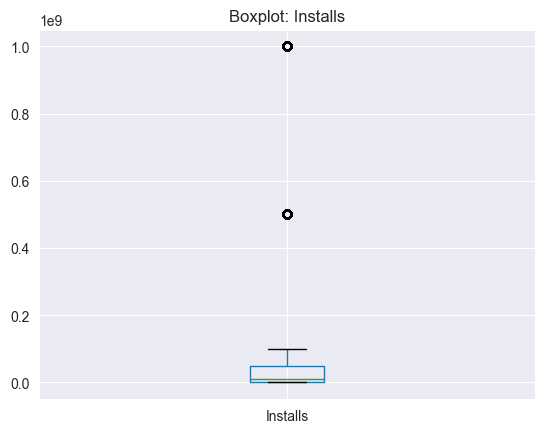

In [15]:
# Boxplot for Rating
df.boxplot(column=['Rating'])
plt.title("Boxplot: Rating")
plt.show()
# Boxplot for Installs
df.boxplot(column=['Installs'])
plt.title("Boxplot: Installs")
plt.show()

#### "A few outliers were observed in the data - apps with extreme high installs and other with very low ratings. These represent real world extremes highly successful apps or poorly received ones. They were retained in the dataset, as they add value to the overall analysis."

### Log transformation

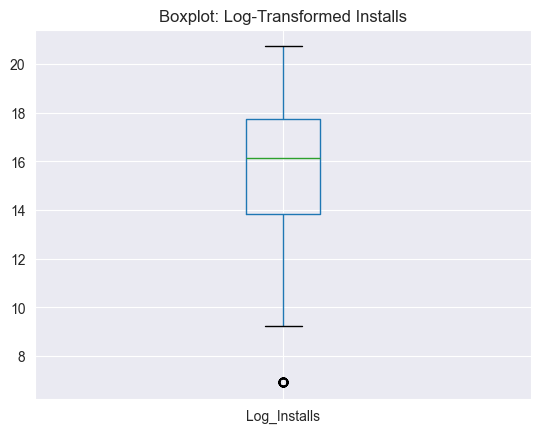

In [16]:
df['Log_Installs'] = np.log1p(df['Installs'])
df.boxplot(column=['Log_Installs'])
plt.title("Boxplot: Log-Transformed Installs")
plt.show()

### Visualizing the data
#### Before log transformation

In [17]:
df['Total_Cost'] = df['Estimated_Budget'] + df['Estimated_Marketing_Spend']
fig = px.scatter(df,x=df['Total_Cost'],y=df['Installs'],size='ROI',color='Category',hover_name='App',hover_data=['Rating',  'Installs', 'ROI'],opacity = 0.7,size_max=50,title="Installs vs Cost with ROI(Return on Investment) Bubble Size")
fig.update_layout(template='plotly_dark')
fig.show()

##### As you can see
In this analysis, success is defined not only by user satisfaction, but by overall efficiency and impact - Such as ROI (Return on Investment), install counts and category trends. Some cost-effective apps with average rating still qualify as successful under those criteria.

#### After Log transformation

In [18]:
fig = px.scatter(df,x=df['Total_Cost'],y=df['Log_Installs'],size='ROI',color='Category',hover_name='App',hover_data=['Rating',  'Installs', 'ROI'],opacity = 0.7,size_max=50,title="Installs vs Cost with ROI(Return on Investment) Bubble Size")
fig.update_layout(template='plotly_dark')
fig.show()

Analyzed app market dataset using Plotly Express. Visualized installs vs cost with ROI as bubble size and category as colour. Insights reveal high-ROI category and cost-effective app investments.

### What category of apps has the most success overall?

In [19]:
df_sort = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
# Bar chart
bar = px.bar(df_sort, x='Category', y='Installs', color='Category')
bar.update_layout(xaxis_tickangle=-45, xaxis_title='Category')
bar.show()

This visualization helps stakeholders quickly identify high-performing app  categories and can guide decisions related to market demand, investment focus, or category-specific strategies.

### Does app size affect the popularity of an app?

In [20]:
df_sort = df.groupby('Size')['Installs'].sum().sort_values(ascending=False).reset_index()
bar = px.bar(df_sort, x='Size', y='Installs')
bar.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Size',
    yaxis_type='log',  # Use log scale for the y-axis
    title='App Popularity by Size (Total Installs)'
)
bar.show()

Conclusion:- Not significantly. In today's technology-driven era, app size has minimal impact on popularity.

### Does pricing the app reduce install counts?

In [21]:
sort = df.groupby('Type')['Installs'].sum().reset_index()
print(sort)

   Type       Installs
0  Free  2384763540000
1  Paid      111237000


### Key Insight:
Yes, pricing an app significantly reduces install counts. Free apps reach a much wider audience and often see install counts in the billions, as users are not hindered by a purchase barrier. On the other hand, paid apps tend to have far fewer installs due to the financial commitment required upfront.
### Effective Strategy:
A more effective approach is to offer the app for free initially, allowing users to download and explore the app without any cost. Once a user is engaged, monetization can be achieved through in-app purchases or premium packages. This strategy not only maximizes user acquisition but also creates opportunities for higher revenue through optional, value-added features.

## Final conclusion
My analysis revealed that the most significant factors contributing to an app’s success were pricing and ROI (Return on Investment). Additionally, certain categories, such as Games, Photography, and Social apps, tend to be more successful than others in terms of both installs and revenue. This suggests that apps in these categories have higher user engagement and market demand.